# Table of Contents
* [Introduction to Pytorch](#Introduction-to-Pytorch)
	* [Numpy arrays and Pytorch Tensors](#Numpy-arrays-and-Pytorch-Tensors)
	* [Training linear models with numpy and pytorch](#Training-linear-models-with-numpy-and-pytorch)
	* [Training a neural network with one hidden layer with numpy and pytorch](#Training-a-neural-network-with-one-hidden-layer-with-numpy-and-pytorch)
	* [Using the pytorch nn module to create and train a neural network](#Using-the-pytorch-nn-module-to-create-and-train-a-neural-network)
	* [One more time, with our neural net numpy implementation](#One-more-time,-with-our-neural-net-numpy-implementation)
	* [Comparison of error vs  iterations for pytorch SGD vs pytorch Adam vs our SCG](#Comparison-of-error-vs--iterations-for-pytorch-SGD-vs-pytorch-Adam-vs-our-SCG)


# Introduction to Pytorch

[Pytorch](https://pytorch.org/) is a Python-based scientific computing package targeted at two sets of audiences:

   - A replacement for NumPy to use the power of GPUs
   - a deep learning research platform that provides maximum flexibility and speed
   
(quote from [DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ, What is Pytorch?](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py))

There are other deep-learning frameworks out there.  [Tensorflow](https://www.tensorflow.org/) is the most popular one, but the rate at which pytorch is being chosen is accelerating.  [Fast.ai](https://www.fast.ai/) has chosen pytorch as the foundation for its popular deep learning package.

Pytorch is a rather short learning step from numpy.  A simple approach is to change numpy arrays to pytorch Tensors and designate them to reside on a GPU.  Many of numpy functions and operations are duplicated for pytorch Tensors.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Numpy arrays and Pytorch Tensors

In [47]:
A = 0.1 * np.arange(50).reshape((10, 5))
B = 0.1 * np.arange(15).reshape((5, 3))
print('A\n', A)
print('\nB\n', B)

C = A @ B
print('\nC = A @ B\n', C)

A
 [[0.  0.1 0.2 0.3 0.4]
 [0.5 0.6 0.7 0.8 0.9]
 [1.  1.1 1.2 1.3 1.4]
 [1.5 1.6 1.7 1.8 1.9]
 [2.  2.1 2.2 2.3 2.4]
 [2.5 2.6 2.7 2.8 2.9]
 [3.  3.1 3.2 3.3 3.4]
 [3.5 3.6 3.7 3.8 3.9]
 [4.  4.1 4.2 4.3 4.4]
 [4.5 4.6 4.7 4.8 4.9]]

B
 [[0.  0.1 0.2]
 [0.3 0.4 0.5]
 [0.6 0.7 0.8]
 [0.9 1.  1.1]
 [1.2 1.3 1.4]]

C = A @ B
 [[ 0.9   1.    1.1 ]
 [ 2.4   2.75  3.1 ]
 [ 3.9   4.5   5.1 ]
 [ 5.4   6.25  7.1 ]
 [ 6.9   8.    9.1 ]
 [ 8.4   9.75 11.1 ]
 [ 9.9  11.5  13.1 ]
 [11.4  13.25 15.1 ]
 [12.9  15.   17.1 ]
 [14.4  16.75 19.1 ]]


Now, do this same calculation as pytorch Tensors.

In [48]:
import torch

In [49]:
At = torch.from_numpy(A)
Bt = torch.from_numpy(B)
print('At\n', At)
print('\nBt\n', Bt)

Ct = At @ Bt
print('\nCt = At @ Bt\n', Ct)

At
 tensor([[0.0000, 0.1000, 0.2000, 0.3000, 0.4000],
        [0.5000, 0.6000, 0.7000, 0.8000, 0.9000],
        [1.0000, 1.1000, 1.2000, 1.3000, 1.4000],
        [1.5000, 1.6000, 1.7000, 1.8000, 1.9000],
        [2.0000, 2.1000, 2.2000, 2.3000, 2.4000],
        [2.5000, 2.6000, 2.7000, 2.8000, 2.9000],
        [3.0000, 3.1000, 3.2000, 3.3000, 3.4000],
        [3.5000, 3.6000, 3.7000, 3.8000, 3.9000],
        [4.0000, 4.1000, 4.2000, 4.3000, 4.4000],
        [4.5000, 4.6000, 4.7000, 4.8000, 4.9000]], dtype=torch.float64)

Bt
 tensor([[0.0000, 0.1000, 0.2000],
        [0.3000, 0.4000, 0.5000],
        [0.6000, 0.7000, 0.8000],
        [0.9000, 1.0000, 1.1000],
        [1.2000, 1.3000, 1.4000]], dtype=torch.float64)

Ct = At @ Bt
 tensor([[ 0.9000,  1.0000,  1.1000],
        [ 2.4000,  2.7500,  3.1000],
        [ 3.9000,  4.5000,  5.1000],
        [ 5.4000,  6.2500,  7.1000],
        [ 6.9000,  8.0000,  9.1000],
        [ 8.4000,  9.7500, 11.1000],
        [ 9.9000, 11.5000, 13.1000],
   

And, with a slight flick of the wrist, this calculation can be done on a GPU, if your computer happens to have one.

In [50]:
!nvidia-smi

Sat Nov 24 21:19:53 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:24:00.0  On |                  N/A |
|  0%   23C    P2    36W / 215W |   1916MiB /  8116MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [51]:
Atc = torch.from_numpy(A).cuda()  # <---here is the magic
Btc = torch.from_numpy(B).cuda()
print('At\n', Atc)
print('\nBt\n', Btc)

Ctc = Atc @ Btc
print('\nCtc = Atc @ Btc\n', Ctc)

At
 tensor([[0.0000, 0.1000, 0.2000, 0.3000, 0.4000],
        [0.5000, 0.6000, 0.7000, 0.8000, 0.9000],
        [1.0000, 1.1000, 1.2000, 1.3000, 1.4000],
        [1.5000, 1.6000, 1.7000, 1.8000, 1.9000],
        [2.0000, 2.1000, 2.2000, 2.3000, 2.4000],
        [2.5000, 2.6000, 2.7000, 2.8000, 2.9000],
        [3.0000, 3.1000, 3.2000, 3.3000, 3.4000],
        [3.5000, 3.6000, 3.7000, 3.8000, 3.9000],
        [4.0000, 4.1000, 4.2000, 4.3000, 4.4000],
        [4.5000, 4.6000, 4.7000, 4.8000, 4.9000]],
       device='cuda:0', dtype=torch.float64)

Bt
 tensor([[0.0000, 0.1000, 0.2000],
        [0.3000, 0.4000, 0.5000],
        [0.6000, 0.7000, 0.8000],
        [0.9000, 1.0000, 1.1000],
        [1.2000, 1.3000, 1.4000]], device='cuda:0', dtype=torch.float64)

Ctc = Atc @ Btc
 tensor([[ 0.9000,  1.0000,  1.1000],
        [ 2.4000,  2.7500,  3.1000],
        [ 3.9000,  4.5000,  5.1000],
        [ 5.4000,  6.2500,  7.1000],
        [ 6.9000,  8.0000,  9.1000],
        [ 8.4000,  9.7500, 11.100

How do you know it was performed on the GPU?  Let's time them.

In [52]:
import time

In [53]:
n_repetitions = 100000

In [54]:
start_time = time.time()
for i in range(n_repetitions):
    C = A @ B
print('Numpy took', time.time() - start_time, 'seconds')

Numpy took 0.12737083435058594 seconds


In [55]:
start_time = time.time()
for i in range(n_repetitions):
    Ct = At @ Bt
print('Torch took', time.time() - start_time, 'seconds')

Torch took 0.27942466735839844 seconds


In [56]:
start_time = time.time()
for i in range(n_repetitions):
    Ctc = Atc @ Btc
print('Torch on GPU took', time.time() - start_time, 'seconds')

Torch on GPU took 0.8677489757537842 seconds


The true advantage of the GPU is with larger matrices.

In [57]:
a = 1000
b = 500
c = 1000

A = 0.1 * np.arange(a * b).reshape((a, b))
B = 0.1 * np.arange(b * c).reshape((b, c))
At = torch.from_numpy(A)
Bt = torch.from_numpy(B)
Atc = torch.from_numpy(A).cuda()
Btc = torch.from_numpy(B).cuda()

n_repetitions = 10
start_time = time.time()
for i in range(n_repetitions):
    C = A @ B
print('Numpy took', time.time() - start_time, 'seconds')

start_time = time.time()
for i in range(n_repetitions):
    Ct = At @ Bt
print('Torch took', time.time() - start_time, 'seconds')

start_time = time.time()
for i in range(n_repetitions):
    Ctc = Atc @ Btc
print('Torch on GPU took', time.time() - start_time, 'seconds')

Numpy took 0.25754737854003906 seconds
Torch took 0.17803096771240234 seconds
Torch on GPU took 0.0006082057952880859 seconds


## Training linear models with numpy and pytorch

Let's try this with our initial neural network code that we used to fit a linear model to one-dimensional data.

In [58]:
nSamples = 100000
X = np.random.uniform(0,10,(nSamples,1))
T = 2 - 0.1 * X + np.random.normal(0,0.1,(nSamples,1)) + 0.0*(X-6)**2 # Change 0 to 0.05 to try to fit nonlinear cloud

In [59]:
def train(X, T, W, learning_rate, nIterations):
    nSamples = X.shape[0]
    start_time = time.time()
    
    for step in range(nIterations):

        # Forward calculation of predicted output.
        Y = X @ W[1:, :] + W[0:1, :]
        # Backward calculation of gradient and its use to update W
        error = (T - Y) / nSamples
        # print((error**2).sum())
        try:
            W[1:, :] += learning_rate * X.T @ error
        except:
            W[1:, :] += learning_rate * X.t() @ error  # because .T for transpose not defined in pytorch
 
        W[0:1, :] += learning_rate * error.sum(0)
    
    print('train took', time.time() - start_time, 'seconds')
    return W

def use(X, W):
    return X @ W[1:, :] + W[0:1, :]

In [60]:
W = np.zeros((X.shape[1] + 1, T.shape[1]))
W = train(X, T, W, 0.01, 1000)
W

train took 0.49582505226135254 seconds


array([[ 1.82671274],
       [-0.07376479]])

In [61]:
Y = use(X, W)
print('RMSE is', np.sqrt(((T - Y)**2).mean()))

RMSE is 0.13222187708043973


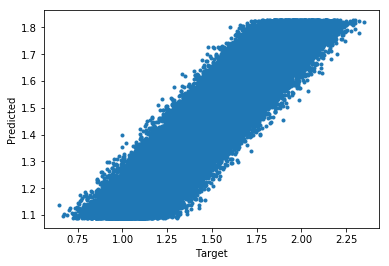

In [62]:
plt.plot(T, Y, '.')
plt.xlabel('Target')
plt.ylabel('Predicted');

Now, to run on a GPU, just change the types of the arrays.

In [63]:
Xtc = torch.from_numpy(X).cuda()
Ttc = torch.from_numpy(T).cuda()
W = np.zeros((X.shape[1] + 1, T.shape[1]))
Wtc = torch.from_numpy(W).cuda()

Wtc = train(Xtc, Ttc, Wtc, 0.01, 1000)
Wtc

train took 0.41233205795288086 seconds


tensor([[ 1.8267],
        [-0.0738]], device='cuda:0', dtype=torch.float64)

In [64]:
Ytc = use(Xtc, Wtc)
print('RMSE is', np.sqrt(((Ttc - Ytc)**2).mean()))

RMSE is tensor(0.1322, dtype=torch.float64)


To use matplotlib, we must first convert Ytc to a numpy array by moving the tensor from the GPU back to the CPU, then convert it to a numpy array.  Easy to do with `.cpu().numpy()`

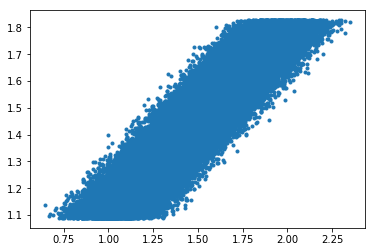

In [65]:
plt.plot(T, Ytc.cpu().numpy(), '.');

## Training a neural network with one hidden layer with numpy and pytorch

Now let's try this more non-linear function with a network having one layer of hidden units.

$$
f(x) = 0.2 + 0.05 (x+10) + 0.4 \sin(x+10)) + 0.2 \epsilon
$$

where $\epsilon$ is a random variable drawn from the standard normal
distribution, or $\epsilon \sim \mathcal{N}(0,1)$, and $x \in [-10,10]$.

In [66]:
# Make some training data
n = 10000
X = np.linspace(0.,20.0,n).reshape((n,1)) - 10
T = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(X+10) + 0.2 * np.random.normal(size=(n,1))

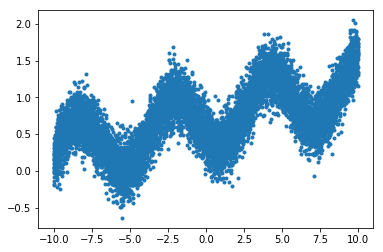

In [67]:
plt.plot(X, T,'.');

In [68]:
def train(X, T, learning_rate_hidden, learning_rate_output, nHiddens, nIterations):
    nSamples = X.shape[0]
    nOutputs = T.shape[1]

    # Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
    V = 0.1*2*(np.random.uniform(size=(1+1, nHiddens))-0.5)
    W = 0.1*2*(np.random.uniform(size=(1+nHiddens ,nOutputs))-0.5)

    if not isinstance(X, np.ndarray):
        V = torch.from_numpy(V).cuda()
        W = torch.from_numpy(W).cuda()

    start_time = time.time()
    
    for step in range(nIterations):

        # Forward pass on training data
        if isinstance(X, np.ndarray):
            Z = np.tanh(X @ V[1:, :] + V[0:1, :])
        else:
            Z = (X @ V[1:, :] + V[0:1, :]).tanh()
        Y = Z @ W[1:, :] + W[0:1, :]

        # Error in output
        deltaW = (T - Y) / nSamples

        lrh = learning_rate_hidden
        lro = learning_rate_output
        # Backward pass - the backpropagation and weight update steps
        try:
            deltaV = (deltaW @ W[1:, :].T) * (1 - Z**2)
            V[1:, :] += lrh * X.T @ deltaV
            V[0:1, :] += lrh * deltaV.sum(0)
            W[1:, :] += lro * Z.T @ deltaW
            W[0:1, :] += lro * deltaW.sum()
        except:
            deltaV = (deltaW @ W[1:, :].t()) * (1 - Z**2)
            V[1:, :] += lrh * X.t() @ deltaV
            V[0:1, :] += lrh * deltaV.sum(0)
            W[1:, :] += lro * Z.t() @ deltaW
            W[0:1, :] += lro * deltaW.sum()
           
    print('train took', time.time() - start_time, 'seconds')
    
    return V, W

def use(X, V, W):
    if isinstance(X, np.ndarray):
        Z = np.tanh(X @ V[1:, :] + V[0:1, :])
    else:
        Z = (X @ V[1:, :] + V[0:1, :]).tanh()
    Y = Z @ W[1:, :] + W[0:1, :]
    return Y

In [69]:
nHiddens = 100
nIterations = 1000
learning_rate = 0.01
learning_rate_hidden = 10.0
V, W = train(X, T, learning_rate_hidden, learning_rate, nHiddens, nIterations)

train took 11.000857591629028 seconds


RMSE is 0.2840012134348384


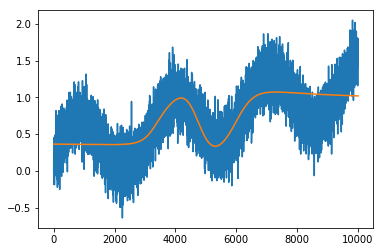

In [70]:
Y = use(X, V, W)
print('RMSE is', np.sqrt(((T - Y)**2).mean()))
plt.plot(T)
plt.plot(Y);

In [71]:
Xtc = torch.from_numpy(X).cuda()
Ttc = torch.from_numpy(T).cuda()
Vtc, Wtc = train(Xtc, Ttc, learning_rate_hidden, learning_rate, nHiddens, nIterations)

train took 1.360502004623413 seconds


RMSE is 0.2855156948565339


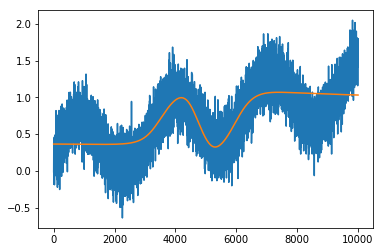

In [72]:
Ytc = use(Xtc, Vtc, Wtc)
Y = Ytc.cpu().numpy()
print('RMSE is', np.sqrt(((T - Y)**2).mean()))
plt.plot(T)
plt.plot(Y);

## Using the pytorch nn module to create and train a neural network

In [73]:
def train_pytorch(X, T, learning_rate, nHiddens, nIterations, useAdam=False):
    
    class Torchnn(torch.nn.Module):
    
        def __init__(self, n_inputs, n_hidden_units, n_outputs):
            super(Torchnn, self).__init__()
            self.hidden = torch.nn.Linear(n_inputs, n_hidden_units) 
            self.tanh = torch.nn.Tanh()
            self.output = torch.nn.Linear(n_hidden_units, n_outputs)

        def forward(self, X):
            out = self.hidden(X)
            out = self.tanh(out)
            out = self.output(out)
            return out

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Running on', device)
    
    torchnn = Torchnn(1, nHiddens, 1).to(device).double()  # default is single precision
    
    if useAdam:
        optimizer = torch.optim.Adam(torchnn.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.SGD(torchnn.parameters(), lr=learning_rate)
    loss_func = torch.nn.MSELoss()
    
    errors = []
    startTime = time.time()

    for iteration in range(nIterations):
        # Forward pass
        outputs = torchnn(Xtc)
        loss = loss_func(outputs, Ttc)
        errors.append(torch.sqrt(loss))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Training took {} seconds'.format(time.time() - startTime))
    
    return torchnn, errors

In [74]:
torchnn, errors_torchnn = train_pytorch(Xtc, Ttc, learning_rate, nHiddens, nIterations)

Running on cuda
Training took 1.13545823097229 seconds


In [77]:
Xtc.shape

torch.Size([10000, 1])

In [78]:
Ttc.shape

torch.Size([10000, 1])

RMSE is 0.2896746352465496


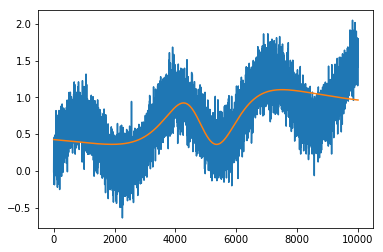

In [75]:
with torch.no_grad():
    Ytc = torchnn(Xtc)
    Y = Ytc.cpu().numpy()
    print('RMSE is', np.sqrt(((T - Y)**2).mean()))
plt.plot(T)
plt.plot(Y);

## One more time, with our neural net numpy implementation

Our implementation uses the scaled conjugate gradient algorithm to optimize weights. 

In [33]:
import neuralnetworks as nn

In [34]:
# import imp
# imp.reload(nn)

In [37]:
def train_scg(X, T, nHiddens, nIterations):
    nnet = nn.NeuralNetwork(1, nHiddens, 1)
    startTime = time.time()
    nnet.train(X, T, nIterations)
    print('Training took {} seconds'.format(time.time() - startTime))
    return nnet 

In [39]:
nnet = train_scg(X, T, nHiddens, nIterations)

Training took 22.854265451431274 seconds


RMSE is 0.20154287982045788


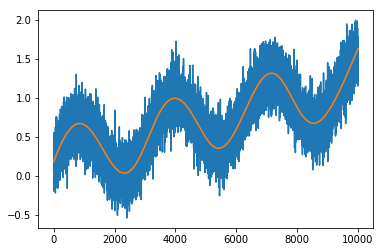

In [40]:
Y = nnet.use(X)
print('RMSE is', np.sqrt(((T - Y)**2).mean()))
plt.plot(T)
plt.plot(Y);

## Comparison of error vs  iterations for pytorch SGD vs pytorch Adam vs our SCG

--- Pytorch SGD ---
Running on cuda
Training took 1.14229416847229 seconds
RMSE is 0.28847056093104045


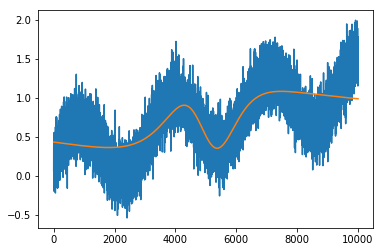

In [41]:
print('--- Pytorch SGD ---')
torchnn_sgd, errors_sgd = train_pytorch(Xtc, Ttc, learning_rate, nHiddens, nIterations)
with torch.no_grad():
    Ytc = torchnn_sgd(Xtc)
    Y = Ytc.cpu().numpy()
    print('RMSE is', np.sqrt(((T - Y)**2).mean()))
plt.plot(T)
plt.plot(Y);

--- Pytorch Adam ---
Running on cuda
Training took 1.1471967697143555 seconds
RMSE is 0.2151564479727315


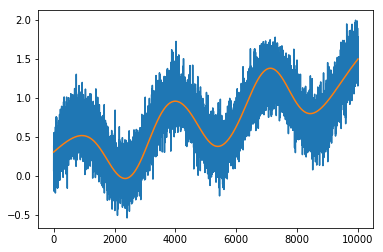

In [42]:
print('--- Pytorch Adam ---')
torchnn_adam, errors_adam = train_pytorch(Xtc, Ttc, learning_rate, nHiddens, nIterations, useAdam=True)
with torch.no_grad():
    Ytc = torchnn_adam(Xtc)
    Y = Ytc.cpu().numpy()
    print('RMSE is', np.sqrt(((T - Y)**2).mean()))
plt.plot(T)
plt.plot(Y);

--- Our Code SCG ---
Training took 22.917031288146973 seconds
RMSE is 0.2015491680206128


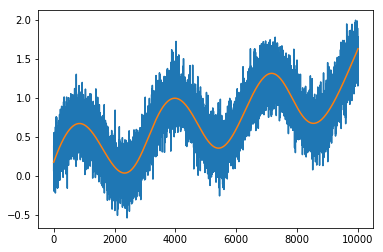

In [44]:
print('--- Our Code SCG ---')
nnet = train_scg(X, T, nHiddens, nIterations)
Y = nnet.use(X)
print('RMSE is', np.sqrt(((T - Y)**2).mean()))
plt.plot(T)
plt.plot(Y);

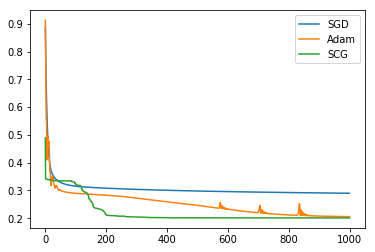

In [39]:
plt.plot(errors_sgd, label='SGD')
plt.plot(errors_adam, label='Adam')
plt.plot(errors_scg, label='SCG')
plt.legend();

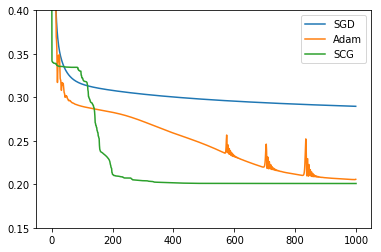

In [40]:
plt.plot(errors_sgd, label='SGD')
plt.plot(errors_adam, label='Adam')
plt.plot(errors_scg, label='SCG')
plt.ylim(0.15, 0.4)
plt.legend();

Try our neural network code again with a version that runs on GPUs.

In [45]:
import neuralnetworks_gpu as nn_gpu

def train_scg_gpu(X, T, nHiddens, nIterations, useGPU=True):
    nnet = nn_gpu.NeuralNetwork(1, nHiddens, 1, useGPU=useGPU)
    startTime = time.time()
    nnet.train(X, T, nIterations)
    print('Training took {} seconds'.format(time.time() - startTime))
    return nnet

ModuleNotFoundError: No module named 'neuralnetworks_gpu'

In [42]:
print('--- Our Code SCG on GPU ---')
nnet2, errors_scg = train_scg_gpu(X, T, nHiddens, nIterations)

Y = nnet2.use(X)
print('RMSE is', np.sqrt(((T - Y)**2).mean()))

--- Our Code SCG on GPU ---
Training took 2.0220112800598145 seconds
RMSE is 0.2015507827689561


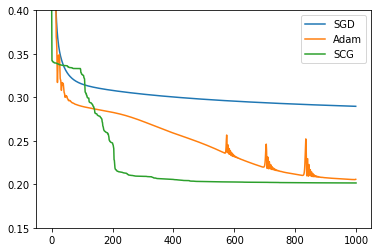

In [43]:
plt.plot(errors_sgd, label='SGD')
plt.plot(errors_adam, label='Adam')
plt.plot(errors_scg, label='SCG')
plt.ylim(0.15, 0.4)
plt.legend();

In [44]:
print('--- Our Code SCG CPU ---')
nnet2, errors_scg2 = train_scg_gpu(X, T, nHiddens, nIterations, useGPU=False)

Y = nnet2.use(X)
print('RMSE is', np.sqrt(((T - Y)**2).mean()))

--- Our Code SCG CPU ---
Training took 5.698402643203735 seconds
RMSE is 0.20174052313289428


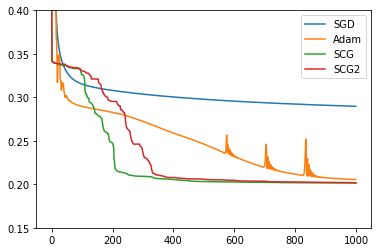

In [45]:
plt.plot(errors_sgd, label='SGD')
plt.plot(errors_adam, label='Adam')
plt.plot(errors_scg, label='SCG')
plt.plot(errors_scg2, label='SCG2')
plt.ylim(0.15, 0.4)
plt.legend();